# 台湾加権指数 週足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

In [3]:
code = 'TWII'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

In [4]:
# 週足で過去 5 年分のデータを取得
df0 = ticker.history(period='10y', interval='1wk')

# ローソク足のチャートには、そのうち過去 3 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_3y =  datetime.timedelta(days=365 * 3)
df = df0[df0.index >= dt_last - tdelta_3y]

## Moving Median

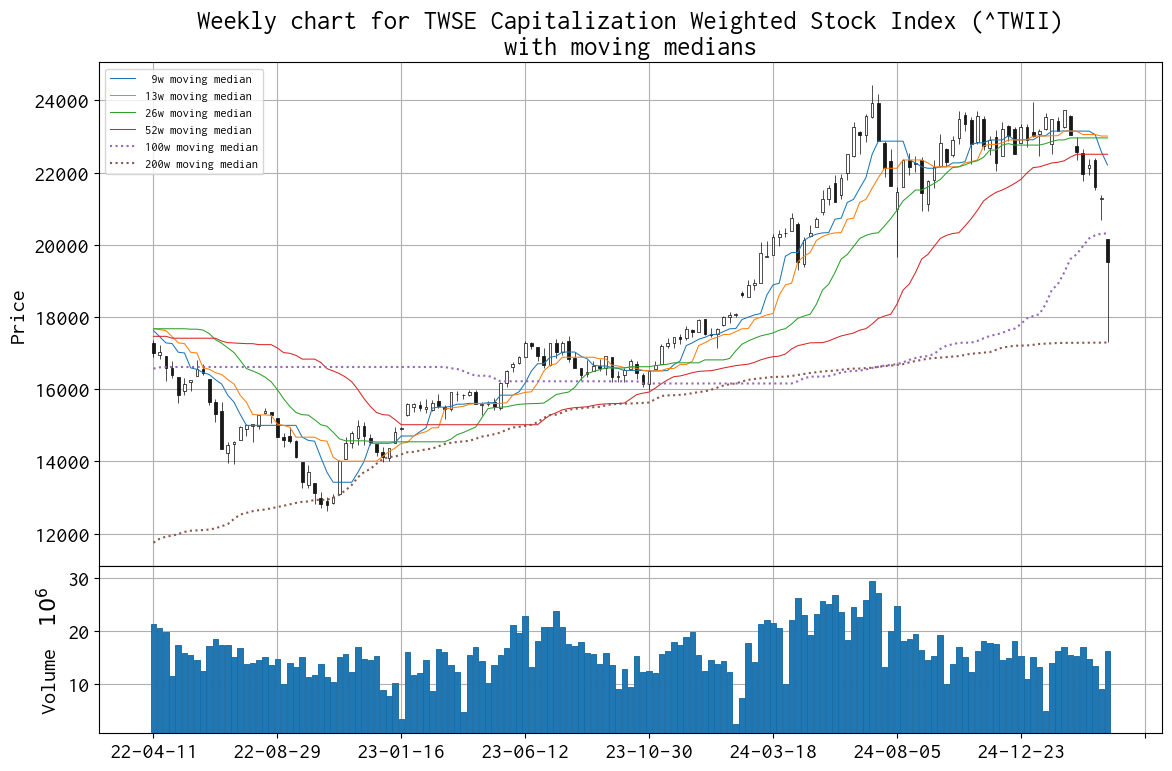

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()
mm100 = df0['Close'].rolling(100).median()
mm200 = df0['Close'].rolling(200).median()

apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w moving median', ax=ax[0]),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w moving median', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w moving median', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w moving median', ax=ax[0]),
    mpf.make_addplot(mm100[df.index], width=1.5, linestyle='dotted', label='100w moving median', ax=ax[0]),
    mpf.make_addplot(mm200[df.index], width=1.5, linestyle='dotted', label='200w moving median', ax=ax[0]),
]   

mpf.plot(df, type='candle', style='default', volume=ax[1], datetime_format='%y-%m-%d', addplot=apds, xrotation=0, ax=ax[0])

ax[0].set_title('Weekly chart for %s (%s)\nwith moving medians' %(ticker.info['longName'], symbol))
ax[0].legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('report_weekly_chart_median_%s.png' % code)
plt.show()

In [6]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-31 00:00:00+08:00,21254.630859,21390.519531,20695.900391,21298.220703,9087600,0.0,0.0
2025-04-07 00:00:00+08:00,20153.570312,20153.570312,17306.970703,19528.769531,16236300,0.0,0.0


In [7]:
df.tail(2)['Close']

Date
2025-03-31 00:00:00+08:00    21298.220703
2025-04-07 00:00:00+08:00    19528.769531
Name: Close, dtype: float64

In [8]:
df.tail(2)['Close'].diff()

Date
2025-03-31 00:00:00+08:00            NaN
2025-04-07 00:00:00+08:00   -1769.451172
Name: Close, dtype: float64

In [9]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-04-07 00:00:00+08:00   -624.800781
dtype: float64

In [10]:
df['Close'].rolling(9).median().tail(10)

Date
2025-02-03 00:00:00+08:00    23148.080078
2025-02-10 00:00:00+08:00    23148.080078
2025-02-17 00:00:00+08:00    23152.609375
2025-02-24 00:00:00+08:00    23152.609375
2025-03-03 00:00:00+08:00    23148.080078
2025-03-10 00:00:00+08:00    23148.080078
2025-03-17 00:00:00+08:00    23148.080078
2025-03-24 00:00:00+08:00    23053.179688
2025-03-31 00:00:00+08:00    22576.070312
2025-04-07 00:00:00+08:00    22209.099609
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(13).median().tail(10)

Date
2025-02-03 00:00:00+08:00    23020.480469
2025-02-10 00:00:00+08:00    23020.480469
2025-02-17 00:00:00+08:00    23148.080078
2025-02-24 00:00:00+08:00    23148.080078
2025-03-03 00:00:00+08:00    23148.080078
2025-03-10 00:00:00+08:00    23053.179688
2025-03-17 00:00:00+08:00    23053.179688
2025-03-24 00:00:00+08:00    23053.179688
2025-03-31 00:00:00+08:00    23011.859375
2025-04-07 00:00:00+08:00    23011.859375
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(26).median().tail(10)

Date
2025-02-03 00:00:00+08:00    22862.214844
2025-02-10 00:00:00+08:00    22902.980469
2025-02-17 00:00:00+08:00    22906.310547
2025-02-24 00:00:00+08:00    22960.080078
2025-03-03 00:00:00+08:00    22960.080078
2025-03-10 00:00:00+08:00    22960.080078
2025-03-17 00:00:00+08:00    22960.080078
2025-03-24 00:00:00+08:00    22960.080078
2025-03-31 00:00:00+08:00    22960.080078
2025-04-07 00:00:00+08:00    22960.080078
Name: Close, dtype: float64

In [13]:
df['Close'].rolling(52).median().tail(10)

Date
2025-02-03 00:00:00+08:00    22265.294922
2025-02-10 00:00:00+08:00    22285.400391
2025-02-17 00:00:00+08:00    22326.020508
2025-02-24 00:00:00+08:00    22427.025391
2025-03-03 00:00:00+08:00    22507.485352
2025-03-10 00:00:00+08:00    22507.485352
2025-03-17 00:00:00+08:00    22507.485352
2025-03-24 00:00:00+08:00    22507.485352
2025-03-31 00:00:00+08:00    22507.485352
2025-04-07 00:00:00+08:00    22507.485352
Name: Close, dtype: float64

## Robust Bollinger bands

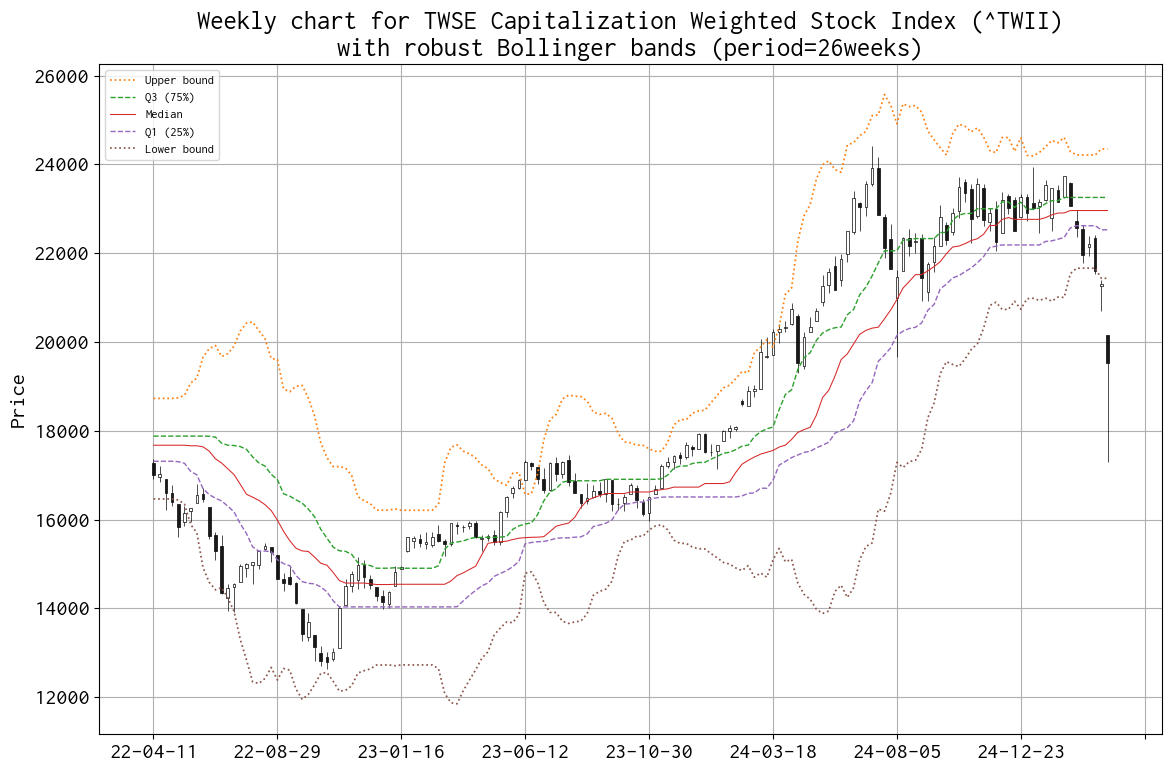

In [14]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 26
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]

mpf.plot(df, type='candle', style='default', addplot=apds, datetime_format='%y-%m-%d', xrotation=0, ax=ax)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラムと Q-Q プロット

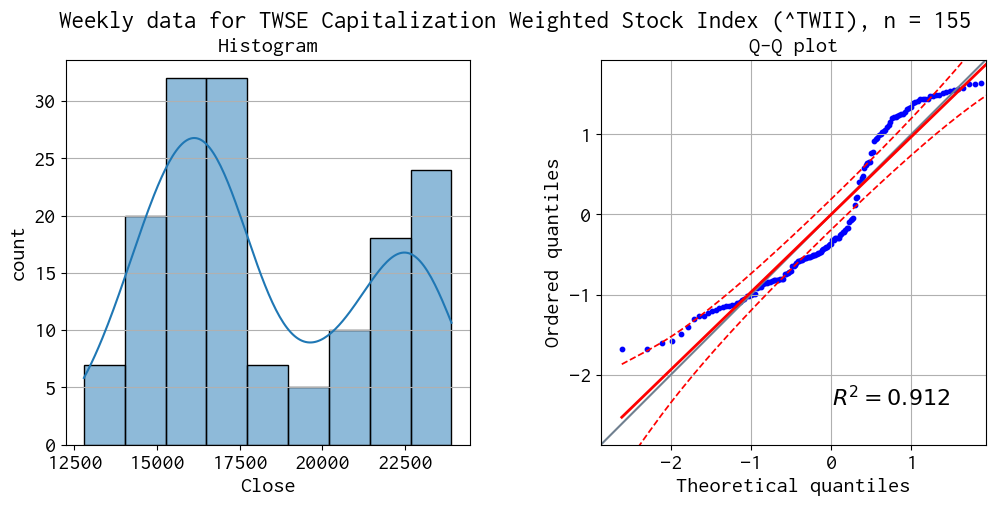

In [15]:
plt.rcParams['font.size'] = 16
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    df['Close'],
    kde=True,
    ax=axes[0]
)

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis = 'y')
axes[0].set_title('Histogram', fontsize=16)

# Q-Q プロット
pg.qqplot(df['Close'], s=10,  ax=axes[1])
axes[1].set_title('Q-Q plot', fontsize=16)
axes[1].grid()

plt.suptitle('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)), fontsize=18)
plt.subplots_adjust(wspace=0.3)
plt.savefig('report_weekly_histogram_qqplot_%s.png' % code)
plt.show()